<a href="https://colab.research.google.com/github/KishorKaphle/ML-Python-projects-and-book-readings/blob/main/FaceDetectionGUI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


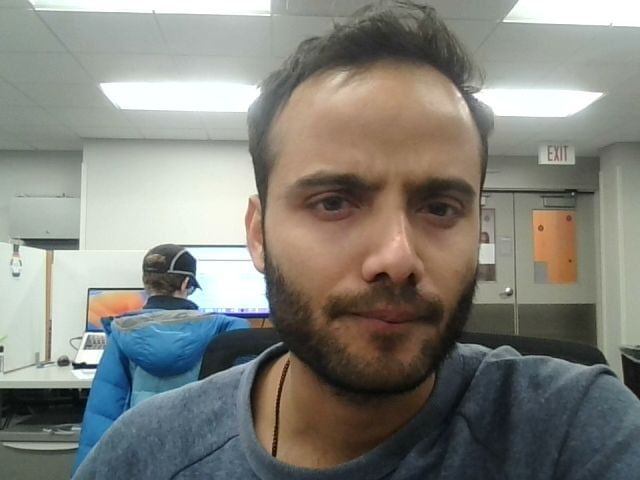

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
!pip install opencv-contrib-python

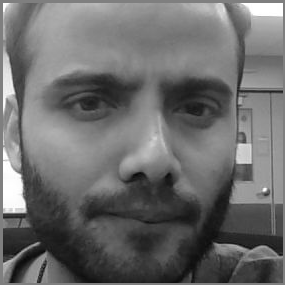

In [ ]:
#import numpy and opencv
import numpy as np
import cv2

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

image = cv2.imread('/content/photo.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)


faces = face_cascade.detectMultiScale(gray,1.3,5)

from google.colab.patches import cv2_imshow
for (x,y,w,h) in faces:
    cv2.rectangle(gray,(x,y),(x+w,y+h),(127,0,255),3)
    cv2_imshow(gray[y:y+h, x:x+w])
    #cv2_imshow(gray)


In [ ]:

import numpy as np
import cv2
import os
import pathlib
import datetime
import pygame
import pygame.camera


class takePicture:

	def __init__ (self, DirPath):
		self.DirPath = DirPath
		pygame.camera.init()

	def snapShot(self):
		camlist = pygame.camera.list_cameras()
		if camlist:
			cam = pygame.camera.Camera(camlist[0], (640, 480))
			cam.start()
			Image = cam.get_image()
			return Image
		else:
			print('No camera detected on this device! :(')
			return None

	def saveImage(self):
		Image = self.snapShot()
		if Image is None:
			print('No image captured!')
			return
		userID = input('Enter your ID number')
		if userID in next(os.walk('.'))[1]:
      userDir = os.path.join(self.DirPath, userID)
        exten = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
        filename = os.path.join(userDir, exten)
        pygame.image.save(Image, filename)
    else:
        decision = input('Your info does not exist yet in the system, want to be a user (Y/N)')
        decision = decision.lower()
        if decision == 'y' or 'yes':
            userDir = os.path.join(self.DirPath, userID)
            os.mkdir(userDir)
            exten = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
            filename=os.path.join(userDir, exten)
            pygame.image.save(Image, filename)



class extractFace:
	def __init__(self, path):
		self.path = path

	def face_image(self):
		face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
		Image = cv2.imread(self.path)
		gray = cv2.cvtColor(Image,cv2.COLOR_BGR2GRAY)
		face = face_cascade.detectMultiScale(gray,1.3,5)
		return face


path = pathlib.Path().resolve()
t = takePicture(DirPath=path)
t.saveImage()
f= extractFace(path= path)
face = f.face_image()


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 29)